In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# Read data from .csv file
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv', delimiter=',')

In [3]:
df.head(15)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
5,1744-04-01,1.530,4.680,Åland
6,1744-05-01,6.702,1.789,Åland
7,1744-06-01,11.609,1.577,Åland
8,1744-07-01,15.342,1.410,Åland
9,1744-08-01,NaN,NaN,Åland


In [4]:
# Main data descriptors
df.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [5]:
# List of countries in the data
df_country = df.Country.unique()
df_country

array(['Åland', 'Afghanistan', 'Africa', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica',
       'Antigua And Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Baker Island', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius And Saba', 'Bosnia And Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Bulgaria',
       'Burkina Faso', 'Burma', 'Burundi', "Côte D'Ivoire", 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'Christmas Island', 'Colombia', 'Comoros',
       'Congo (Democratic Republic Of The)', 'Congo', 'Costa Rica',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic',
       'Denmark (Europe)', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecu

In [6]:
# Number of countries
len(df_country)

243

In [7]:
# Remove 'AverageTemperatureUncertainty' column
df_US = df.drop('AverageTemperatureUncertainty', axis=1)

In [8]:
# Choose United States
df_US = df_US[df_US.Country == "United States"]

# Drop 'Country' column
df_US = df_US.drop('Country',axis=1)

# Set 'dt'(date) column as index
df_US.index = pd.to_datetime(df_US.dt)

# Drop the duplicate 'dt' column
df_US = df_US.drop('dt', axis=1)

df_US

,AverageTemperature
dt,
1768-09-01,15.420
1768-10-01,8.162
1768-11-01,1.591
1768-12-01,-2.882
1769-01-01,-3.952
...,...
2013-05-01,14.073
2013-06-01,20.198
2013-07-01,22.074


In [9]:
# Filter out data before 1970-01-01
df_US = df_US.loc['1970-01-01':]

In [10]:
df_US.head()

,AverageTemperature
dt,
1970-01-01,-5.642
1970-02-01,-0.253
1970-03-01,1.783
1970-04-01,7.389
1970-05-01,14.433


In [11]:
# Check for null values
df_US[df_US.isnull()]

,AverageTemperature
dt,
1970-01-01,NaN
1970-02-01,NaN
1970-03-01,NaN
1970-04-01,NaN
1970-05-01,NaN
...,...
2013-05-01,NaN
2013-06-01,NaN
2013-07-01,NaN


In [12]:
# Count null values
len(df_US[df_US.isnull()])

525

In [13]:
df_US = df_US.sort_index()
df_US.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '2012-12-01', '2013-01-01', '2013-02-01', '2013-03-01',
               '2013-04-01', '2013-05-01', '2013-06-01', '2013-07-01',
               '2013-08-01', '2013-09-01'],
              dtype='datetime64[ns]', name='dt', length=525, freq=None)

In [14]:
# Replace NaN values with the previous effective data
df_US.AverageTemperature.fillna(method='pad', inplace=True)

In [15]:
# Check for null values
df_US[df_US.AverageTemperature.isnull()]

,AverageTemperature
dt,


In [16]:
# Main data descriptors
df_US.describe()

,AverageTemperature
count,525.000000
mean,9.267305
std,8.872120
min,-6.620000
25%,1.440000
50%,9.220000
75%,18.273000
max,23.008000


In [17]:
df_US['Ticks'] = range(0,len(df_US.index.values))

In [18]:
df_US.head(10)

,AverageTemperature,Ticks
dt,,
1970-01-01,-5.642,0
1970-02-01,-0.253,1
1970-03-01,1.783,2
1970-04-01,7.389,3
1970-05-01,14.433,4
1970-06-01,18.803,5
1970-07-01,21.560,6
1970-08-01,21.043,7
1970-09-01,15.814,8


<Figure size 432x288 with 0 Axes>

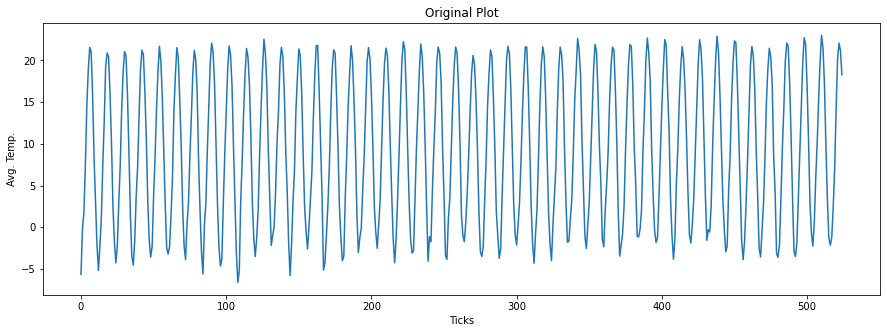

In [19]:
# Plot 'Avg Temp' vs. 'Ticks'
fig = plt.figure(1)

plt.figure(figsize=(15,5))

plt.title('Original Plot')
plt.xlabel('Ticks')
plt.ylabel('Avg. Temp.')

plt.plot('Ticks', 'AverageTemperature', data = df_US, );

In [20]:
df_US

,AverageTemperature,Ticks
dt,,
1970-01-01,-5.642,0
1970-02-01,-0.253,1
1970-03-01,1.783,2
1970-04-01,7.389,3
1970-05-01,14.433,4
...,...,...
2013-05-01,14.073,520
2013-06-01,20.198,521
2013-07-01,22.074,522


In [21]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    # Determing rolling statistics    
    roll_mean = ts.rolling(12).mean()
    
    plt.figure(figsize=(15,5))

    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    
    # Perform Augmented Dickey-Fuller(ADF) test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    print("type of df_test: ",type(df_test))
    print("df_test: ",df_test)
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
        
    print(df_output)

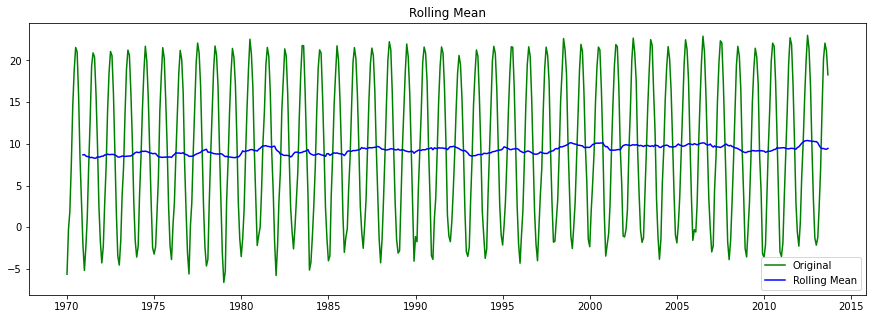

Augmented Dickey-Fuller test:
type of df_test:  <class 'tuple'>
df_test:  (-3.1800243886982154, 0.021170455295877518, 11, 513, {'1%': -3.443161545965353, '5%': -2.8671904981615706, '10%': -2.5697795041589244}, 1388.8999891381236)
df_output: 
 Test Statistic                  -3.180024
p-value                          0.021170
#Lags Used                      11.000000
Number of Observations Used    513.000000
dtype: float64
Test Statistic                  -3.180024
p-value                          0.021170
#Lags Used                      11.000000
Number of Observations Used    513.000000
Critical Value (1%)             -3.443162
Critical Value (5%)             -2.867190
Critical Value (10%)            -2.569780
dtype: float64


In [22]:
test_stationarity(df_US.AverageTemperature)

In [23]:
# As the p-value is below the threshold value(0.05),
# we can reject null-hypothesis, which states that the data is not stationary.

df_US['Roll_Mean'] = df_US.AverageTemperature.rolling(12).mean()

In [24]:
df_US.AverageTemperature.rolling(12).mean()

dt
1970-01-01         NaN
1970-02-01         NaN
1970-03-01         NaN
1970-04-01         NaN
1970-05-01         NaN
                ...   
2013-05-01    9.428167
2013-06-01    9.448500
2013-07-01    9.370667
2013-08-01    9.349500
2013-09-01    9.452583
Name: AverageTemperature, Length: 525, dtype: float64

In [25]:
df_US.head(20)

,AverageTemperature,Ticks,Roll_Mean
dt,,,
1970-01-01,-5.642,0,NaN
1970-02-01,-0.253,1,NaN
1970-03-01,1.783,2,NaN
1970-04-01,7.389,3,NaN
1970-05-01,14.433,4,NaN
1970-06-01,18.803,5,NaN
1970-07-01,21.560,6,NaN
1970-08-01,21.043,7,NaN
1970-09-01,15.814,8,NaN


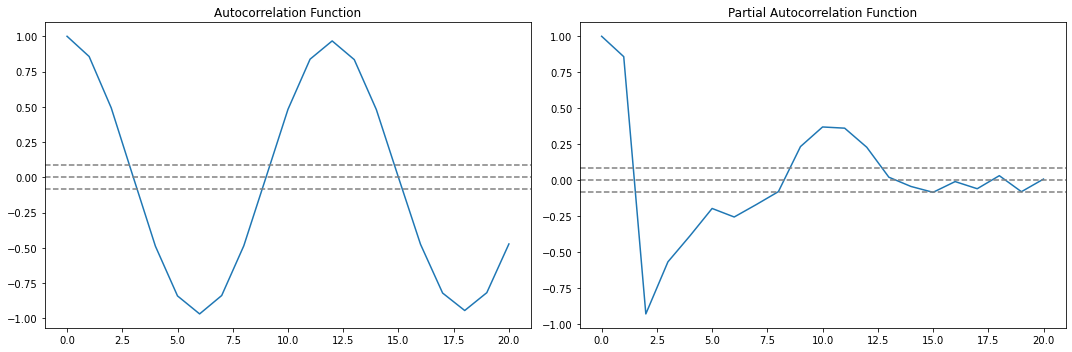

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

lag_acf = acf(df_US.AverageTemperature, nlags=20)
lag_pacf = pacf(df_US.AverageTemperature, nlags=20, method='ols')

plt.figure(figsize=(15,5))

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_US.AverageTemperature)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_US.AverageTemperature)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_US.AverageTemperature)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_US.AverageTemperature)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

D:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


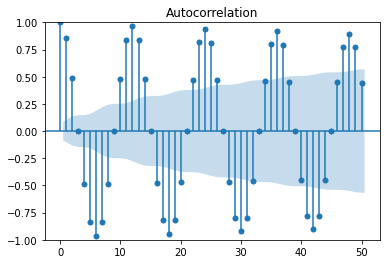

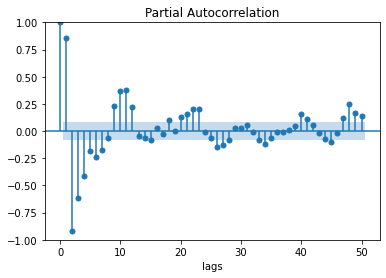

In [27]:
plot_acf(df_US.AverageTemperature, lags=50)
plot_pacf(df_US.AverageTemperature, lags=50)
plt.xlabel('lags')
plt.show()

In [28]:
import statsmodels.api as smapi

import itertools
p = q = range(0, 4)
pq = itertools.product(p, q)
for param in pq:
    try:
        mod = ARIMA(df_US.AverageTemperature,order=param)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(param, results.aic))
    except:
        continue

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


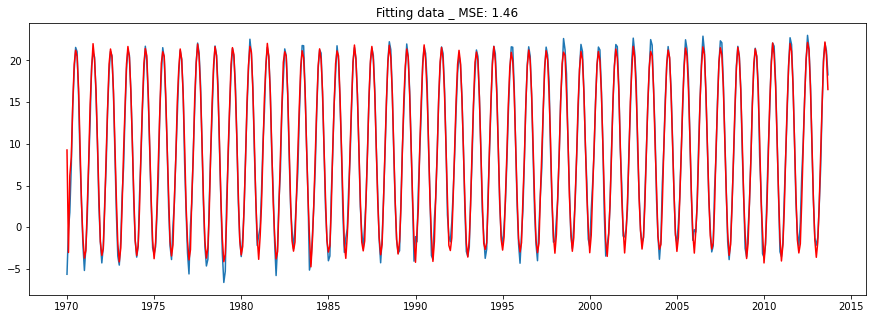

In [29]:
model = ARIMA(df_US.AverageTemperature, order=(2,0,3))  
results_MA = model.fit()  

plt.figure(figsize=(15,5))

plt.plot(df_US.AverageTemperature)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('Fitting data _ MSE: %.2f'% (((results_MA.fittedvalues-df_US.AverageTemperature)**2).mean()))
plt.show()

In [30]:
# Forecast US weather upto 2023
forecast = results_MA.predict('01/01/1970', '12/01/2023')
forecast

1970-01-01     9.261366
1970-02-01    -3.025947
1970-03-01     6.168426
1970-04-01     8.363525
1970-05-01    14.643589
                ...    
2023-08-01    20.497968
2023-09-01    16.240413
2023-10-01    10.114249
2023-11-01     3.761235
2023-12-01    -1.116535
Freq: MS, Name: predicted_mean, Length: 648, dtype: float64

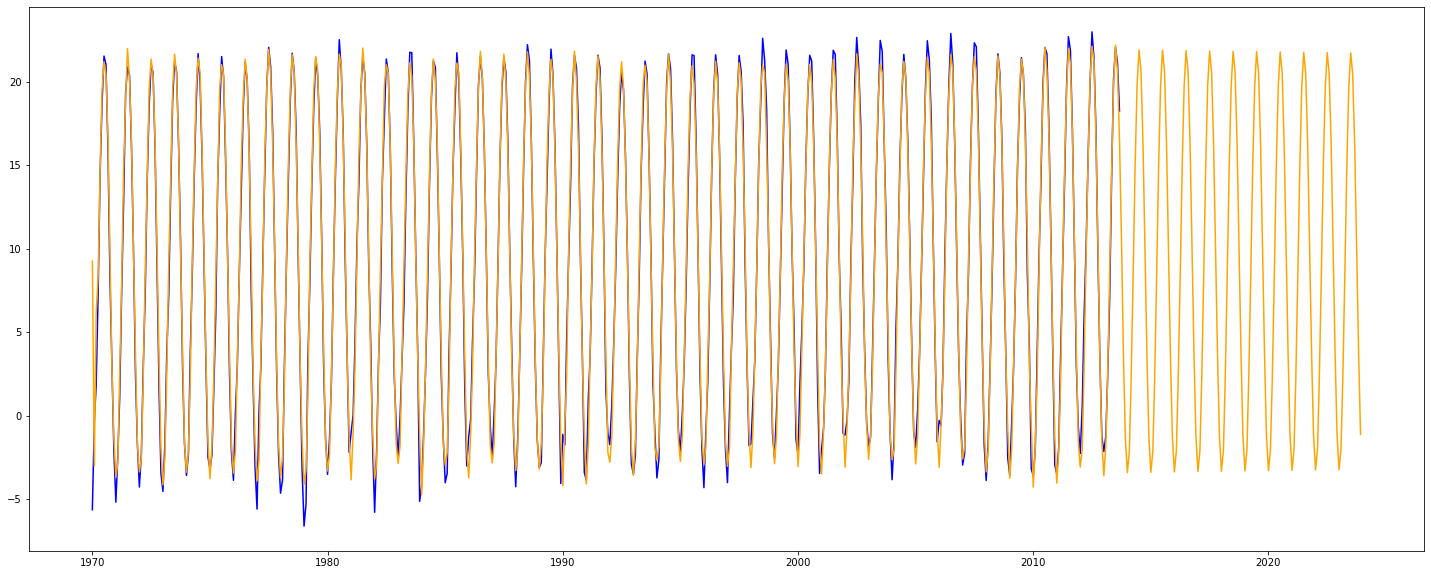

In [32]:
plt.figure(figsize=(25,10))

# Original Avg. Temp. data (Blue)
plt.plot(df_US.AverageTemperature, color='blue')

# Forecasted Avg. Temp. (Orange)
plt.plot(forecast, color='orange')